In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import numpy as np
import requests
import time
import pprint
import json
import os

In [2]:
#Import and Read Cleaned 
data_file = "Annual_HSS_Data_Cleaned_no2011.csv"

clean_data_df= pd.read_csv(data_file, encoding = 'iso-8859-1', low_memory=False)

#clean_data_df= pd.read_csv("Annual_HSS_Data_cleaned.csv")

In [3]:
sort_data_df = clean_data_df[[
                                "contract_award_unique_key",
                                "action_date_fiscal_year",
                                "awarding_sub_agency_name",
                                "awarding_office_name",
                                "recipient_parent_name",
                                 "federal_action_obligation"]]
                           
        
sort_data_df.head(100)

,contract_award_unique_key,action_date_fiscal_year,awarding_sub_agency_name,awarding_office_name,recipient_parent_name,federal_action_obligation
0,CONT_AWD_75D30118C01909_7523_-NONE-_-NONE-,2019,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,BESTICA,0.0
1,CONT_AWD_75D30118C02052_7523_-NONE-_-NONE-,2019,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,2M RESEARCH SERVICES LLC,0.0
2,CONT_AWD_HHSD200201692404C_7523_-NONE-_-NONE-,2019,OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS...,OFFICE OF ACQ MGMT POLICY,LIBRA REALTY GROUP INC.,0.0
3,CONT_AWD_HHSD200201692405C_7523_-NONE-_-NONE-,2019,OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS...,OFFICE OF ACQ MGMT POLICY,AMNEAL BIOSCIENCES LLC,0.0
4,CONT_AWD_HHSD200201692406C_7523_-NONE-_-NONE-,2019,OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS...,OFFICE OF ACQ MGMT POLICY,ACT 1 GROUP INC THE,0.0
...,...,...,...,...,...,...
95,CONT_AWD_HHSI241201800073P_7527_-NONE-_-NONE-,2019,INDIAN HEALTH SERVICE,GREAT PLAINS AREA INDIAN HEALTH SVC,DAX SAFETY & STAFFING SOLUTIONS LLC,0.0
96,CONT_AWD_HHSI245201700099M_7527_-NONE-_-NONE-,2019,INDIAN HEALTH SERVICE,NAVAJO AREA INDIAN HEALTH SVC,GALLUP FIRE EXTINGUISHER SALES & SERVICE INC,-1000.5
97,CONT_AWD_75FCMC18F0001_7530_75FCMC18D0029_7530,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,LANTANA CONSULTING GROUP LLC,0.0
98,CONT_AWD_75FCMC18F0063_7530_47QTCA18D002T_4732,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,BLUE LABS ANALYTICS INC,0.0


In [4]:
#creating datafrmae of clean data

clean_data_df=pd.DataFrame(sort_data_df)
clean_data_df=clean_data_df.sort_values(["federal_action_obligation"], ascending=False) 
clean_data_df.head(30)

,contract_award_unique_key,action_date_fiscal_year,awarding_sub_agency_name,awarding_office_name,recipient_parent_name,federal_action_obligation
536194,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,PFIZER INC.,4.717254e+08
219473,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.671503e+08
397860,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",4.458356e+08
71141,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.113393e+08
501256,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.802961e+08
311693,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.742183e+08
626905,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.724291e+08
27294,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,GENERAL DYNAMICS CORPORATION,3.656774e+08
443282,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08
561354,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,GENERAL DYNAMICS CORPORATION,3.275281e+08


In [5]:
#checking data for null value

sort_data_df["recipient_parent_name"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
644451    False
644452    False
644453    False
644454    False
644455    False
Name: recipient_parent_name, Length: 644456, dtype: bool

In [6]:
#sort data and group by

fund_by_year=pd.DataFrame(sort_data_df.groupby(["contract_award_unique_key","action_date_fiscal_year","recipient_parent_name"])
                          ["federal_action_obligation"].sum())

fund_by_year.reset_index(inplace=True)
fund_by_year

,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation
0,CONT_AWD_0001_7524_HHSF223200510007I_7524,2013,"DECISION PARTNERS, LLC",-4844.52
1,CONT_AWD_0001_7527_HHSI241200810023I_7527,2013,DOUG O'BRYAN CONTRACTING INC.,-2023.64
2,CONT_AWD_0001_7527_HHSI241200810025I_7527,2013,DOUG O'BRYAN CONTRACTING INC.,-3.50
3,CONT_AWD_0001_7527_HHSI241200810026I_7527,2013,MISSOURI VALLEY RADIOLOGY L.L.C.,-1667.33
4,CONT_AWD_0001_7527_HHSI241200810378B_7527,2013,RPH ON THE GO USA INC.,-12541.50
...,...,...,...,...
495603,CONT_AWD_HHSS28342011T_7522_HHSS283201200002I_...,2018,JBS INTERNATIONAL INC.,0.00
495604,CONT_AWD_HHSS28342011T_7522_HHSS283201200006I_...,2016,RESEARCH TRIANGLE INSTITUTE INC,1875676.00
495605,CONT_AWD_HHSS28342011T_7522_HHSS283201200006I_...,2017,RESEARCH TRIANGLE INSTITUTE INC,1640116.00
495606,CONT_AWD_HHSS28342012T_7522_HHSS283201200006I_...,2016,RESEARCH TRIANGLE INSTITUTE INC,2398466.00


In [7]:
#Calculate total fund

total_fund=fund_by_year["federal_action_obligation"].sum()
print(total_fund)

164773116076.61


In [8]:
#save clean data as csv file to check the data

fund_by_year.to_csv("fund_recipient_list.csv", index=False)

In [9]:
#creating topten list of 2016 and calculate percentage of total budget for each company

fund_2016_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2016]
fund_2016_df=fund_2016_df.sort_values(["federal_action_obligation"], ascending=False)   
fund_2016_df.reset_index(inplace=True)

fund_2016_df["Total"]=19861442649.940002
fund_2016_df["Percentage"] = (fund_2016_df["federal_action_obligation"] / fund_2016_df["Total"]) * 100
fund_2016_df.head(15)
list_2016_df=pd.DataFrame(fund_2016_df)
list_2016_df.head(10)


,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271956,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2016,GENERAL DYNAMICS CORPORATION,6.797210e+08,1.986144e+10,3.422314
1,286768,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2016,SAIC INC.,4.362890e+08,1.986144e+10,2.196663
2,272005,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2016,SERCO GROUP PLC,2.510530e+08,1.986144e+10,1.264022
3,105126,CONT_AWD_HHSD200201688487C_7523_-NONE-_-NONE-,2016,SANOFI,2.012985e+08,1.986144e+10,1.013514
4,463417,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2016,EMERGENT BIOSOLUTIONS INC.,1.987050e+08,1.986144e+10,1.000456
5,80589,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2016,EMERGENT BIOSOLUTIONS INC.,1.793776e+08,1.986144e+10,0.903145
6,274233,CONT_AWD_HHSM5002015M0028Z_7530_-NONE-_-NONE-,2016,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1.620792e+08,1.986144e+10,0.816049
7,271733,CONT_AWD_HHSM5002012M0001Z_7530_-NONE-_-NONE-,2016,BLUE CROSS AND BLUE SHIELD OF FLORIDA INC.,1.548002e+08,1.986144e+10,0.779400
8,277412,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2016,HEWLETT PACKARD ENTERPRISE COMPANY,1.537290e+08,1.986144e+10,0.774007
9,273705,CONT_AWD_HHSM500201500246C_7530_-NONE-_-NONE-,2016,ACCENTURE INC.,1.404433e+08,1.986144e+10,0.707115


In [10]:
#calculating the total budget of 2016

total_fund_2016=fund_2016_df["federal_action_obligation"].sum()
print(total_fund_2016)

19861442649.940002


In [11]:
#extract top ten of 2016

top_ten_list_2016=list_2016_df.iloc[0:10,:]
top_ten_2016=pd.DataFrame(top_ten_list_2016)
top_ten_2016

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271956,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2016,GENERAL DYNAMICS CORPORATION,6.797210e+08,1.986144e+10,3.422314
1,286768,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2016,SAIC INC.,4.362890e+08,1.986144e+10,2.196663
2,272005,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2016,SERCO GROUP PLC,2.510530e+08,1.986144e+10,1.264022
3,105126,CONT_AWD_HHSD200201688487C_7523_-NONE-_-NONE-,2016,SANOFI,2.012985e+08,1.986144e+10,1.013514
4,463417,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2016,EMERGENT BIOSOLUTIONS INC.,1.987050e+08,1.986144e+10,1.000456
5,80589,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2016,EMERGENT BIOSOLUTIONS INC.,1.793776e+08,1.986144e+10,0.903145
6,274233,CONT_AWD_HHSM5002015M0028Z_7530_-NONE-_-NONE-,2016,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1.620792e+08,1.986144e+10,0.816049
7,271733,CONT_AWD_HHSM5002012M0001Z_7530_-NONE-_-NONE-,2016,BLUE CROSS AND BLUE SHIELD OF FLORIDA INC.,1.548002e+08,1.986144e+10,0.779400
8,277412,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2016,HEWLETT PACKARD ENTERPRISE COMPANY,1.537290e+08,1.986144e+10,0.774007
9,273705,CONT_AWD_HHSM500201500246C_7530_-NONE-_-NONE-,2016,ACCENTURE INC.,1.404433e+08,1.986144e+10,0.707115


In [12]:
#creating topten list of 2012 and calculate percentage of total budget for each company

fund_2012_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2012]
fund_2012_df=fund_2012_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2012_df.reset_index(inplace=True)
fund_2012_df.head(10)

fund_2012_df["Total"]=18335069956.83
fund_2012_df["Percentage"] = (fund_2012_df["federal_action_obligation"] / fund_2012_df["Total"]) * 100
fund_2012_df.head(15)
list_2012_df=pd.DataFrame(fund_2012_df)
list_2012_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,83794,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2012,"MERCK & CO., INC.",8.900211e+08,1.833507e+10,4.854201
1,83797,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2012,PFIZER INC.,7.466970e+08,1.833507e+10,4.072507
2,83800,CONT_AWD_HHSD200201250136C_7523_-NONE-_-NONE-,2012,SANOFI,5.366491e+08,1.833507e+10,2.926900
3,286764,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2012,SAIC INC.,5.204117e+08,1.833507e+10,2.838340
4,78935,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,"MERCK & CO., INC.",4.855663e+08,1.833507e+10,2.648292
5,78942,CONT_AWD_HHSD200201138203C_7523_-NONE-_-NONE-,2012,PFIZER INC.,3.605407e+08,1.833507e+10,1.966399
6,80585,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2012,EMERGENT BIOSOLUTIONS INC.,3.525385e+08,1.833507e+10,1.922755
7,83791,CONT_AWD_HHSD200201250132C_7523_-NONE-_-NONE-,2012,GLAXOSMITHKLINE PLC,3.514480e+08,1.833507e+10,1.916807
8,269018,CONT_AWD_HHSM500200900002U_7530_26301D0054_7530,2012,LOCKHEED MARTIN CORPORATION,2.046685e+08,1.833507e+10,1.116268
9,276257,CONT_AWD_HHSM500T0001_7530_HHSM500200700001I_7530,2012,GENERAL DYNAMICS CORPORATION,1.964725e+08,1.833507e+10,1.071567


In [13]:
#calculating the total budget of 2012

total_fund_2012=fund_2012_df["federal_action_obligation"].sum()
print(total_fund_2012)

18335069956.83


In [14]:
#extrating top 10 of 2012

top_ten_list_2012=list_2012_df.iloc[0:10,:]
top_ten_2012=pd.DataFrame(top_ten_list_2012)
top_ten_2012

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,83794,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2012,"MERCK & CO., INC.",8.900211e+08,1.833507e+10,4.854201
1,83797,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2012,PFIZER INC.,7.466970e+08,1.833507e+10,4.072507
2,83800,CONT_AWD_HHSD200201250136C_7523_-NONE-_-NONE-,2012,SANOFI,5.366491e+08,1.833507e+10,2.926900
3,286764,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2012,SAIC INC.,5.204117e+08,1.833507e+10,2.838340
4,78935,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,"MERCK & CO., INC.",4.855663e+08,1.833507e+10,2.648292
5,78942,CONT_AWD_HHSD200201138203C_7523_-NONE-_-NONE-,2012,PFIZER INC.,3.605407e+08,1.833507e+10,1.966399
6,80585,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2012,EMERGENT BIOSOLUTIONS INC.,3.525385e+08,1.833507e+10,1.922755
7,83791,CONT_AWD_HHSD200201250132C_7523_-NONE-_-NONE-,2012,GLAXOSMITHKLINE PLC,3.514480e+08,1.833507e+10,1.916807
8,269018,CONT_AWD_HHSM500200900002U_7530_26301D0054_7530,2012,LOCKHEED MARTIN CORPORATION,2.046685e+08,1.833507e+10,1.116268
9,276257,CONT_AWD_HHSM500T0001_7530_HHSM500200700001I_7530,2012,GENERAL DYNAMICS CORPORATION,1.964725e+08,1.833507e+10,1.071567


In [15]:
#creating topten list of 2013 and calculate percentage of total budget for each company

fund_2013_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2013]
fund_2013_df=fund_2013_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2013_df.reset_index(inplace=True)
fund_2013_df

fund_2013_df["Total"]=19760093354.660004
fund_2013_df["Percentage"] = (fund_2013_df["federal_action_obligation"] / fund_2013_df["Total"]) * 100
fund_2013_df.head(15)
list_2013_df=pd.DataFrame(fund_2013_df)
list_2013_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,91165,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,"MERCK & CO., INC.",9.254305e+08,1.976009e+10,4.683331
1,91162,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,PFIZER INC.,6.567851e+08,1.976009e+10,3.323795
2,286765,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2013,SAIC INC.,5.958887e+08,1.976009e+10,3.015617
3,271953,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,GENERAL DYNAMICS CORPORATION,5.322601e+08,1.976009e+10,2.693611
4,83795,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2013,"MERCK & CO., INC.",4.796296e+08,1.976009e+10,2.427264
5,91168,CONT_AWD_HHSD200201354510C_7523_-NONE-_-NONE-,2013,GLAXOSMITHKLINE PLC,3.367412e+08,1.976009e+10,1.704148
6,91159,CONT_AWD_HHSD200201354507C_7523_-NONE-_-NONE-,2013,SANOFI,2.885536e+08,1.976009e+10,1.460285
7,83798,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2013,PFIZER INC.,2.302127e+08,1.976009e+10,1.165039
8,80586,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2013,EMERGENT BIOSOLUTIONS INC.,2.267449e+08,1.976009e+10,1.147489
9,83792,CONT_AWD_HHSD200201250132C_7523_-NONE-_-NONE-,2013,GLAXOSMITHKLINE PLC,2.033750e+08,1.976009e+10,1.029221


In [16]:
#calculating the total budget of 2013

total_fund_2013=fund_2013_df["federal_action_obligation"].sum()
print(total_fund_2013)

19760093354.659996


In [17]:
#Extrating top 10 of 2013

top_ten_list_2013=list_2013_df.iloc[0:10,:]
top_ten_2013=pd.DataFrame(top_ten_list_2013)
top_ten_2013

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,91165,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,"MERCK & CO., INC.",9.254305e+08,1.976009e+10,4.683331
1,91162,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,PFIZER INC.,6.567851e+08,1.976009e+10,3.323795
2,286765,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2013,SAIC INC.,5.958887e+08,1.976009e+10,3.015617
3,271953,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,GENERAL DYNAMICS CORPORATION,5.322601e+08,1.976009e+10,2.693611
4,83795,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2013,"MERCK & CO., INC.",4.796296e+08,1.976009e+10,2.427264
5,91168,CONT_AWD_HHSD200201354510C_7523_-NONE-_-NONE-,2013,GLAXOSMITHKLINE PLC,3.367412e+08,1.976009e+10,1.704148
6,91159,CONT_AWD_HHSD200201354507C_7523_-NONE-_-NONE-,2013,SANOFI,2.885536e+08,1.976009e+10,1.460285
7,83798,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2013,PFIZER INC.,2.302127e+08,1.976009e+10,1.165039
8,80586,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2013,EMERGENT BIOSOLUTIONS INC.,2.267449e+08,1.976009e+10,1.147489
9,83792,CONT_AWD_HHSD200201250132C_7523_-NONE-_-NONE-,2013,GLAXOSMITHKLINE PLC,2.033750e+08,1.976009e+10,1.029221


In [18]:
#creating topten list of 2014 and calculate percentage of total budget for each company

fund_2014_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2014]
fund_2014_df=fund_2014_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2014_df.reset_index(inplace=True)
fund_2014_df.head(10)

fund_2014_df["Total"]=21524186077.64
fund_2014_df["Percentage"] = (fund_2014_df["federal_action_obligation"] / fund_2014_df["Total"]) * 100
fund_2014_df.head(15)
list_2014_df=pd.DataFrame(fund_2014_df)
list_2014_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,96088,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,"MERCK & CO., INC.",9.137755e+08,2.152419e+10,4.245343
1,271954,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2014,GENERAL DYNAMICS CORPORATION,6.242547e+08,2.152419e+10,2.900248
2,96094,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2014,PFIZER INC.,5.868276e+08,2.152419e+10,2.726364
3,286766,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2014,SAIC INC.,5.394578e+08,2.152419e+10,2.506287
4,91166,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2014,"MERCK & CO., INC.",4.471767e+08,2.152419e+10,2.077555
5,55137,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08,2.152419e+10,1.605175
6,96091,CONT_AWD_HHSD200201458151C_7523_-NONE-_-NONE-,2014,GLAXOSMITHKLINE PLC,3.219371e+08,2.152419e+10,1.495699
7,91163,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2014,PFIZER INC.,2.685571e+08,2.152419e+10,1.247699
8,272003,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2014,SERCO GROUP PLC,2.386594e+08,2.152419e+10,1.108796
9,96084,CONT_AWD_HHSD200201458149C_7523_-NONE-_-NONE-,2014,SANOFI,2.269081e+08,2.152419e+10,1.054200


In [19]:
#calculating the total budget of 2014

total_fund_2014=fund_2014_df["federal_action_obligation"].sum()
print(total_fund_2014)

21524186077.640003


In [20]:
#Extrating top 10 of 2014

top_ten_list_2014=list_2014_df.iloc[0:10,:]
top_ten_2014=pd.DataFrame(top_ten_list_2014)
top_ten_2014

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,96088,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,"MERCK & CO., INC.",9.137755e+08,2.152419e+10,4.245343
1,271954,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2014,GENERAL DYNAMICS CORPORATION,6.242547e+08,2.152419e+10,2.900248
2,96094,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2014,PFIZER INC.,5.868276e+08,2.152419e+10,2.726364
3,286766,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2014,SAIC INC.,5.394578e+08,2.152419e+10,2.506287
4,91166,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2014,"MERCK & CO., INC.",4.471767e+08,2.152419e+10,2.077555
5,55137,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08,2.152419e+10,1.605175
6,96091,CONT_AWD_HHSD200201458151C_7523_-NONE-_-NONE-,2014,GLAXOSMITHKLINE PLC,3.219371e+08,2.152419e+10,1.495699
7,91163,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2014,PFIZER INC.,2.685571e+08,2.152419e+10,1.247699
8,272003,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2014,SERCO GROUP PLC,2.386594e+08,2.152419e+10,1.108796
9,96084,CONT_AWD_HHSD200201458149C_7523_-NONE-_-NONE-,2014,SANOFI,2.269081e+08,2.152419e+10,1.054200


In [21]:
#creating topten list of 2015 and calculate percentage of total budget for each company

fund_2015_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2015]
fund_2015_df=fund_2015_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2015_df.reset_index(inplace=True)
fund_2015_df

fund_2015_df["Total"]=19451594748.87
fund_2015_df["Percentage"] = (fund_2015_df["federal_action_obligation"] / fund_2015_df["Total"]) * 100
fund_2015_df.head(15)
list_2015_df=pd.DataFrame(fund_2015_df)
list_2015_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271955,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2015,GENERAL DYNAMICS CORPORATION,6.199339e+08,1.945159e+10,3.187060
1,96089,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,"MERCK & CO., INC.",5.668296e+08,1.945159e+10,2.914052
2,96095,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2015,PFIZER INC.,4.463093e+08,1.945159e+10,2.294461
3,286767,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2015,SAIC INC.,3.767760e+08,1.945159e+10,1.936993
4,96092,CONT_AWD_HHSD200201458151C_7523_-NONE-_-NONE-,2015,GLAXOSMITHKLINE PLC,2.801128e+08,1.945159e+10,1.440051
5,277411,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2015,HEWLETT-PACKARD COMPANY,2.051824e+08,1.945159e+10,1.054836
6,96085,CONT_AWD_HHSD200201458149C_7523_-NONE-_-NONE-,2015,SANOFI,2.012651e+08,1.945159e+10,1.034697
7,272004,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2015,SERCO GROUP PLC,1.915214e+08,1.945159e+10,0.984605
8,273704,CONT_AWD_HHSM500201500246C_7530_-NONE-_-NONE-,2015,ACCENTURE INC.,1.552424e+08,1.945159e+10,0.798096
9,100752,CONT_AWD_HHSD200201561387C_7523_-NONE-_-NONE-,2015,SANOFI,1.427213e+08,1.945159e+10,0.733725


In [22]:
#calculating the total budget of 2015

total_fund_2015=fund_2015_df["federal_action_obligation"].sum()
print(total_fund_2015)

19451594748.870007


In [23]:
#Extrating top 10 of 2015 and creating dataframe

top_ten_list_2015=list_2015_df.iloc[0:10,:]
top_ten_2015=pd.DataFrame(top_ten_list_2015)
top_ten_2015

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271955,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2015,GENERAL DYNAMICS CORPORATION,6.199339e+08,1.945159e+10,3.187060
1,96089,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,"MERCK & CO., INC.",5.668296e+08,1.945159e+10,2.914052
2,96095,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2015,PFIZER INC.,4.463093e+08,1.945159e+10,2.294461
3,286767,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2015,SAIC INC.,3.767760e+08,1.945159e+10,1.936993
4,96092,CONT_AWD_HHSD200201458151C_7523_-NONE-_-NONE-,2015,GLAXOSMITHKLINE PLC,2.801128e+08,1.945159e+10,1.440051
5,277411,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2015,HEWLETT-PACKARD COMPANY,2.051824e+08,1.945159e+10,1.054836
6,96085,CONT_AWD_HHSD200201458149C_7523_-NONE-_-NONE-,2015,SANOFI,2.012651e+08,1.945159e+10,1.034697
7,272004,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2015,SERCO GROUP PLC,1.915214e+08,1.945159e+10,0.984605
8,273704,CONT_AWD_HHSM500201500246C_7530_-NONE-_-NONE-,2015,ACCENTURE INC.,1.552424e+08,1.945159e+10,0.798096
9,100752,CONT_AWD_HHSD200201561387C_7523_-NONE-_-NONE-,2015,SANOFI,1.427213e+08,1.945159e+10,0.733725


In [24]:
#creating topten list of 2017 and calculate percentage of total budget for each company

fund_2017_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2017]
fund_2017_df=fund_2017_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2017_df.reset_index()
fund_2017_df

fund_2017_df["Total"]=22401096082.260002
fund_2017_df["Percentage"] = (fund_2017_df["federal_action_obligation"] / fund_2017_df["Total"]) * 100
fund_2017_df.head(15)
list_2017_df=pd.DataFrame(fund_2017_df)
list_2017_df.head(10)

,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
110279,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,MERCK & CO. INC.,9.570207e+08,2.240110e+10,4.272205
271957,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2017,GENERAL DYNAMICS CORPORATION,6.592910e+08,2.240110e+10,2.943119
110282,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2017,PFIZER INC.,6.096745e+08,2.240110e+10,2.721628
286769,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2017,SAIC INC.,5.331326e+08,2.240110e+10,2.379940
110276,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2017,GLAXOSMITHKLINE PLC,3.520177e+08,2.240110e+10,1.571431
272006,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2017,SERCO GROUP PLC,3.337728e+08,2.240110e+10,1.489984
110284,CONT_AWD_HHSD200201793275C_7523_-NONE-_-NONE-,2017,SANOFI,3.136070e+08,2.240110e+10,1.399963
110154,CONT_AWD_HHSD200201792634C_7523_-NONE-_-NONE-,2017,EMERGENT BIOSOLUTIONS INC.,2.139072e+08,2.240110e+10,0.954896
277414,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2017,ENTERPRISE SERVICES LLC,1.868261e+08,2.240110e+10,0.834004
437173,CONT_AWD_HHSN292201700010C_7529_-NONE-_-NONE-,2017,THE WHITING-TURNER CONTRACTING COMPANY,1.810490e+08,2.240110e+10,0.808215


In [25]:
#calculating the total budget of 2017

total_fund_2017=fund_2017_df["federal_action_obligation"].sum()
print(total_fund_2017)

22401096082.25999


In [26]:
#extrating only top 10 rows of 2017 and creating dataframe

top_ten_list_2017=list_2017_df.iloc[0:10,:]
top_ten_2017=pd.DataFrame(top_ten_list_2017)
top_ten_2017

,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
110279,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,MERCK & CO. INC.,9.570207e+08,2.240110e+10,4.272205
271957,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2017,GENERAL DYNAMICS CORPORATION,6.592910e+08,2.240110e+10,2.943119
110282,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2017,PFIZER INC.,6.096745e+08,2.240110e+10,2.721628
286769,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2017,SAIC INC.,5.331326e+08,2.240110e+10,2.379940
110276,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2017,GLAXOSMITHKLINE PLC,3.520177e+08,2.240110e+10,1.571431
272006,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2017,SERCO GROUP PLC,3.337728e+08,2.240110e+10,1.489984
110284,CONT_AWD_HHSD200201793275C_7523_-NONE-_-NONE-,2017,SANOFI,3.136070e+08,2.240110e+10,1.399963
110154,CONT_AWD_HHSD200201792634C_7523_-NONE-_-NONE-,2017,EMERGENT BIOSOLUTIONS INC.,2.139072e+08,2.240110e+10,0.954896
277414,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2017,ENTERPRISE SERVICES LLC,1.868261e+08,2.240110e+10,0.834004
437173,CONT_AWD_HHSN292201700010C_7529_-NONE-_-NONE-,2017,THE WHITING-TURNER CONTRACTING COMPANY,1.810490e+08,2.240110e+10,0.808215


In [27]:
#creating topten list of 2018 and calculate percentage of total budget for each company

fund_2018_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2018]
fund_2018_df=fund_2018_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2018_df.reset_index(inplace=True)
fund_2018_df

fund_2018_df["Total"]=21431638357.65
fund_2018_df["Percentage"] = (fund_2018_df["federal_action_obligation"] / fund_2018_df["Total"]) * 100
fund_2018_df.head(15)
list_2018_df=pd.DataFrame(fund_2018_df)
list_2018_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271958,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2018,GENERAL DYNAMICS CORPORATION,6.083730e+08,2.143164e+10,2.838668
1,286770,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2018,SAIC INC.,5.053985e+08,2.143164e+10,2.358189
2,110280,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,MERCK & CO. INC.,4.966425e+08,2.143164e+10,2.317333
3,110283,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2018,PFIZER INC.,4.192917e+08,2.143164e+10,1.956415
4,110277,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2018,GLAXOSMITHKLINE PLC,3.301494e+08,2.143164e+10,1.540476
5,277416,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2018,ENTERPRISE SERVICES LLC,2.577634e+08,2.143164e+10,1.202724
6,12625,CONT_AWD_75FCMC18F0045_7530_GS00Q09BGD0049_4735,2018,SERCO GROUP PLC,2.012226e+08,2.143164e+10,0.938905
7,110285,CONT_AWD_HHSD200201793275C_7523_-NONE-_-NONE-,2018,SANOFI,1.636011e+08,2.143164e+10,0.763362
8,152869,CONT_AWD_HHSF223201750007A_7524_-NONE-_-NONE-,2018,THE INTERPUBLIC GROUP OF COMPANIES INC,1.604503e+08,2.143164e+10,0.748661
9,1427,CONT_AWD_75A50118F33004_7505_HHSO100201300006I...,2018,AMGEN INC.,1.543946e+08,2.143164e+10,0.720405


In [28]:
#calculating the total budget of 2018

total_fund_2018=fund_2018_df["federal_action_obligation"].sum()
print(total_fund_2018)

21431638357.650005


In [29]:
#extrating only top 10 rowsof 2018 dataframe

top_ten_list_2018=list_2018_df.iloc[0:10,:]
top_ten_2018=pd.DataFrame(top_ten_list_2018)
top_ten_2018

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271958,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2018,GENERAL DYNAMICS CORPORATION,6.083730e+08,2.143164e+10,2.838668
1,286770,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2018,SAIC INC.,5.053985e+08,2.143164e+10,2.358189
2,110280,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,MERCK & CO. INC.,4.966425e+08,2.143164e+10,2.317333
3,110283,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2018,PFIZER INC.,4.192917e+08,2.143164e+10,1.956415
4,110277,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2018,GLAXOSMITHKLINE PLC,3.301494e+08,2.143164e+10,1.540476
5,277416,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2018,ENTERPRISE SERVICES LLC,2.577634e+08,2.143164e+10,1.202724
6,12625,CONT_AWD_75FCMC18F0045_7530_GS00Q09BGD0049_4735,2018,SERCO GROUP PLC,2.012226e+08,2.143164e+10,0.938905
7,110285,CONT_AWD_HHSD200201793275C_7523_-NONE-_-NONE-,2018,SANOFI,1.636011e+08,2.143164e+10,0.763362
8,152869,CONT_AWD_HHSF223201750007A_7524_-NONE-_-NONE-,2018,THE INTERPUBLIC GROUP OF COMPANIES INC,1.604503e+08,2.143164e+10,0.748661
9,1427,CONT_AWD_75A50118F33004_7505_HHSO100201300006I...,2018,AMGEN INC.,1.543946e+08,2.143164e+10,0.720405


In [30]:
#creating topten list of 2019 and calculate percentage of total budget for each company 

fund_2019_df=fund_by_year.loc[fund_by_year["action_date_fiscal_year"]==2019]
fund_2019_df=fund_2019_df.sort_values(["federal_action_obligation"], ascending=False)
fund_2019_df.reset_index(inplace=True)
fund_2019_df

fund_2019_df["Total"]=21431638357.65
fund_2019_df["Percentage"] = (fund_2019_df["federal_action_obligation"] / fund_2019_df["Total"]) * 100
fund_2019_df.head(15)
list_2019_df=pd.DataFrame(fund_2019_df)
list_2019_df.head(10)

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271959,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,GENERAL DYNAMICS CORPORATION,5.749075e+08,2.143164e+10,2.682518
1,28444,CONT_AWD_75N91019F00129_7529_75N91019D00024_7529,2019,SAIC INC.,3.520668e+08,2.143164e+10,1.642743
2,463420,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,2.609881e+08,2.143164e+10,1.217770
3,1644,CONT_AWD_75A50119F33001_7505_75A50118D00009_7505,2019,LOVELL GOVERNMENT SERVICES LLC,2.190000e+08,2.143164e+10,1.021854
4,12848,CONT_AWD_75FCMC19F0001_7530_75FCMC19D0070_7530,2019,LIVANTA LLC,2.046229e+08,2.143164e+10,0.954770
5,51504,CONT_AWD_75P00119C00042_7570_-NONE-_-NONE-,2019,COMPREHENSIVE HEALTH SERVICES HOLDINGS INC,2.021890e+08,2.143164e+10,0.943414
6,12626,CONT_AWD_75FCMC18F0045_7530_GS00Q09BGD0049_4735,2019,SERCO GROUP PLC,1.988358e+08,2.143164e+10,0.927768
7,110156,CONT_AWD_HHSD200201792634C_7523_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,1.729266e+08,2.143164e+10,0.806875
8,1610,CONT_AWD_75A50119C00071_7505_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,1.699880e+08,2.143164e+10,0.793164
9,463531,CONT_AWD_HHSO100201700016C_7505_-NONE-_-NONE-,2019,REGENERON PHARMACEUTICALS INC,1.546364e+08,2.143164e+10,0.721533


In [31]:
#calculating the total budget of 2019

total_fund_2019=fund_2019_df["federal_action_obligation"].sum()
print(total_fund_2019)

22007994848.76


In [32]:
#extrating only top 10 rowsof 2019 dataframe

top_ten_list_2019=list_2019_df.iloc[0:10,:]
top_ten_2019=pd.DataFrame(top_ten_list_2019)
top_ten_2019

,index,contract_award_unique_key,action_date_fiscal_year,recipient_parent_name,federal_action_obligation,Total,Percentage
0,271959,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,GENERAL DYNAMICS CORPORATION,5.749075e+08,2.143164e+10,2.682518
1,28444,CONT_AWD_75N91019F00129_7529_75N91019D00024_7529,2019,SAIC INC.,3.520668e+08,2.143164e+10,1.642743
2,463420,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,2.609881e+08,2.143164e+10,1.217770
3,1644,CONT_AWD_75A50119F33001_7505_75A50118D00009_7505,2019,LOVELL GOVERNMENT SERVICES LLC,2.190000e+08,2.143164e+10,1.021854
4,12848,CONT_AWD_75FCMC19F0001_7530_75FCMC19D0070_7530,2019,LIVANTA LLC,2.046229e+08,2.143164e+10,0.954770
5,51504,CONT_AWD_75P00119C00042_7570_-NONE-_-NONE-,2019,COMPREHENSIVE HEALTH SERVICES HOLDINGS INC,2.021890e+08,2.143164e+10,0.943414
6,12626,CONT_AWD_75FCMC18F0045_7530_GS00Q09BGD0049_4735,2019,SERCO GROUP PLC,1.988358e+08,2.143164e+10,0.927768
7,110156,CONT_AWD_HHSD200201792634C_7523_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,1.729266e+08,2.143164e+10,0.806875
8,1610,CONT_AWD_75A50119C00071_7505_-NONE-_-NONE-,2019,EMERGENT BIOSOLUTIONS INC.,1.699880e+08,2.143164e+10,0.793164
9,463531,CONT_AWD_HHSO100201700016C_7505_-NONE-_-NONE-,2019,REGENERON PHARMACEUTICALS INC,1.546364e+08,2.143164e+10,0.721533


In [33]:
#sorting dataframe to know topten from 2012 to 2019

list_high_funded=sort_data_df.sort_values(["federal_action_obligation"], ascending=False)
list_high_funded.head(10)

,contract_award_unique_key,action_date_fiscal_year,awarding_sub_agency_name,awarding_office_name,recipient_parent_name,federal_action_obligation
536194,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,PFIZER INC.,4.717254e+08
219473,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.671503e+08
397860,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",4.458356e+08
71141,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.113393e+08
501256,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.802961e+08
311693,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.742183e+08
626905,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.724291e+08
27294,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,GENERAL DYNAMICS CORPORATION,3.656774e+08
443282,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08
561354,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,GENERAL DYNAMICS CORPORATION,3.275281e+08


In [34]:
#merging 2012 and 2013 topten
merge_12_13=pd.merge(top_ten_2012,top_ten_2013, how = "outer", on ="contract_award_unique_key")
combined_12_13_df=pd.DataFrame(merge_12_13)
combined_12_13_df

,index_x,contract_award_unique_key,action_date_fiscal_year_x,recipient_parent_name_x,federal_action_obligation_x,Total_x,Percentage_x,index_y,action_date_fiscal_year_y,recipient_parent_name_y,federal_action_obligation_y,Total_y,Percentage_y
0,83794.0,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2012.0,"MERCK & CO., INC.",8.900211e+08,1.833507e+10,4.854201,83795.0,2013.0,"MERCK & CO., INC.",4.796296e+08,1.976009e+10,2.427264
1,83797.0,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2012.0,PFIZER INC.,7.466970e+08,1.833507e+10,4.072507,83798.0,2013.0,PFIZER INC.,2.302127e+08,1.976009e+10,1.165039
2,83800.0,CONT_AWD_HHSD200201250136C_7523_-NONE-_-NONE-,2012.0,SANOFI,5.366491e+08,1.833507e+10,2.926900,NaN,NaN,NaN,NaN,NaN,NaN
3,286764.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2012.0,SAIC INC.,5.204117e+08,1.833507e+10,2.838340,286765.0,2013.0,SAIC INC.,5.958887e+08,1.976009e+10,3.015617
4,78935.0,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012.0,"MERCK & CO., INC.",4.855663e+08,1.833507e+10,2.648292,NaN,NaN,NaN,NaN,NaN,NaN
5,78942.0,CONT_AWD_HHSD200201138203C_7523_-NONE-_-NONE-,2012.0,PFIZER INC.,3.605407e+08,1.833507e+10,1.966399,NaN,NaN,NaN,NaN,NaN,NaN
6,80585.0,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2012.0,EMERGENT BIOSOLUTIONS INC.,3.525385e+08,1.833507e+10,1.922755,80586.0,2013.0,EMERGENT BIOSOLUTIONS INC.,2.267449e+08,1.976009e+10,1.147489
7,83791.0,CONT_AWD_HHSD200201250132C_7523_-NONE-_-NONE-,2012.0,GLAXOSMITHKLINE PLC,3.514480e+08,1.833507e+10,1.916807,83792.0,2013.0,GLAXOSMITHKLINE PLC,2.033750e+08,1.976009e+10,1.029221
8,269018.0,CONT_AWD_HHSM500200900002U_7530_26301D0054_7530,2012.0,LOCKHEED MARTIN CORPORATION,2.046685e+08,1.833507e+10,1.116268,NaN,NaN,NaN,NaN,NaN,NaN
9,276257.0,CONT_AWD_HHSM500T0001_7530_HHSM500200700001I_7530,2012.0,GENERAL DYNAMICS CORPORATION,1.964725e+08,1.833507e+10,1.071567,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Rename  _x columns to "2012" and _y columns to 2013
combined_12_13_df = combined_12_13_df.rename(columns={"action_date_fiscal_year_x":"y_2012", "recipient_parent_name_x":
                                                      "recipient_2012", "federal_action_obligation_x":"obligation_2012",
                                                     "Total_x":"total_2012", "Percentage_x":"pct_2012"})


combined_12_13_df = combined_12_13_df.rename(columns={"action_date_fiscal_year_y":"y_2013", "recipient_parent_name_y":
                                                      "recipient_2013", "federal_action_obligation_y":"obligation_2013",
                                                     "Total_y":"total_2013", "Percentage_y":"pct_2013"})
combined_12_13_df.head()

,index_x,contract_award_unique_key,y_2012,recipient_2012,obligation_2012,total_2012,pct_2012,index_y,y_2013,recipient_2013,obligation_2013,total_2013,pct_2013
0,83794.0,CONT_AWD_HHSD200201250133C_7523_-NONE-_-NONE-,2012.0,"MERCK & CO., INC.",8.900211e+08,1.833507e+10,4.854201,83795.0,2013.0,"MERCK & CO., INC.",4.796296e+08,1.976009e+10,2.427264
1,83797.0,CONT_AWD_HHSD200201250135C_7523_-NONE-_-NONE-,2012.0,PFIZER INC.,7.466970e+08,1.833507e+10,4.072507,83798.0,2013.0,PFIZER INC.,2.302127e+08,1.976009e+10,1.165039
2,83800.0,CONT_AWD_HHSD200201250136C_7523_-NONE-_-NONE-,2012.0,SANOFI,5.366491e+08,1.833507e+10,2.926900,NaN,NaN,NaN,NaN,NaN,NaN
3,286764.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2012.0,SAIC INC.,5.204117e+08,1.833507e+10,2.838340,286765.0,2013.0,SAIC INC.,5.958887e+08,1.976009e+10,3.015617
4,78935.0,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012.0,"MERCK & CO., INC.",4.855663e+08,1.833507e+10,2.648292,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#merging 2014 and 2015 topten
merge_14_15=pd.merge(top_ten_2014,top_ten_2015, how = "outer", on ="contract_award_unique_key")
combined_14_15_df=pd.DataFrame(merge_14_15)
combined_14_15_df

,index_x,contract_award_unique_key,action_date_fiscal_year_x,recipient_parent_name_x,federal_action_obligation_x,Total_x,Percentage_x,index_y,action_date_fiscal_year_y,recipient_parent_name_y,federal_action_obligation_y,Total_y,Percentage_y
0,96088.0,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014.0,"MERCK & CO., INC.",9.137755e+08,2.152419e+10,4.245343,96089.0,2015.0,"MERCK & CO., INC.",5.668296e+08,1.945159e+10,2.914052
1,271954.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2014.0,GENERAL DYNAMICS CORPORATION,6.242547e+08,2.152419e+10,2.900248,271955.0,2015.0,GENERAL DYNAMICS CORPORATION,6.199339e+08,1.945159e+10,3.187060
2,96094.0,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2014.0,PFIZER INC.,5.868276e+08,2.152419e+10,2.726364,96095.0,2015.0,PFIZER INC.,4.463093e+08,1.945159e+10,2.294461
3,286766.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2014.0,SAIC INC.,5.394578e+08,2.152419e+10,2.506287,286767.0,2015.0,SAIC INC.,3.767760e+08,1.945159e+10,1.936993
4,91166.0,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2014.0,"MERCK & CO., INC.",4.471767e+08,2.152419e+10,2.077555,NaN,NaN,NaN,NaN,NaN,NaN
5,55137.0,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014.0,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08,2.152419e+10,1.605175,NaN,NaN,NaN,NaN,NaN,NaN
6,96091.0,CONT_AWD_HHSD200201458151C_7523_-NONE-_-NONE-,2014.0,GLAXOSMITHKLINE PLC,3.219371e+08,2.152419e+10,1.495699,96092.0,2015.0,GLAXOSMITHKLINE PLC,2.801128e+08,1.945159e+10,1.440051
7,91163.0,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2014.0,PFIZER INC.,2.685571e+08,2.152419e+10,1.247699,NaN,NaN,NaN,NaN,NaN,NaN
8,272003.0,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2014.0,SERCO GROUP PLC,2.386594e+08,2.152419e+10,1.108796,272004.0,2015.0,SERCO GROUP PLC,1.915214e+08,1.945159e+10,0.984605
9,96084.0,CONT_AWD_HHSD200201458149C_7523_-NONE-_-NONE-,2014.0,SANOFI,2.269081e+08,2.152419e+10,1.054200,96085.0,2015.0,SANOFI,2.012651e+08,1.945159e+10,1.034697


In [37]:
# Rename  _x columns to "2014" and _y columns to 2015
combined_14_15_df = combined_14_15_df.rename(columns={"action_date_fiscal_year_x":"y_2014", "recipient_parent_name_x":
                                                      "recipient_2014", "federal_action_obligation_x":"obligation_2014",
                                                     "Total_x":"total_2014", "Percentage_x":"pct_2014"})


combined_14_15_df = combined_14_15_df.rename(columns={"action_date_fiscal_year_y":"y_2015", "recipient_parent_name_y":
                                                      "recipient_2015", "federal_action_obligation_y":"obligation_2015",
                                                     "Total_y":"total_2015", "Percentage_y":"pct_2015"})
combined_14_15_df.head()

,index_x,contract_award_unique_key,y_2014,recipient_2014,obligation_2014,total_2014,pct_2014,index_y,y_2015,recipient_2015,obligation_2015,total_2015,pct_2015
0,96088.0,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014.0,"MERCK & CO., INC.",9.137755e+08,2.152419e+10,4.245343,96089.0,2015.0,"MERCK & CO., INC.",5.668296e+08,1.945159e+10,2.914052
1,271954.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2014.0,GENERAL DYNAMICS CORPORATION,6.242547e+08,2.152419e+10,2.900248,271955.0,2015.0,GENERAL DYNAMICS CORPORATION,6.199339e+08,1.945159e+10,3.187060
2,96094.0,CONT_AWD_HHSD200201458152C_7523_-NONE-_-NONE-,2014.0,PFIZER INC.,5.868276e+08,2.152419e+10,2.726364,96095.0,2015.0,PFIZER INC.,4.463093e+08,1.945159e+10,2.294461
3,286766.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2014.0,SAIC INC.,5.394578e+08,2.152419e+10,2.506287,286767.0,2015.0,SAIC INC.,3.767760e+08,1.945159e+10,1.936993
4,91166.0,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2014.0,"MERCK & CO., INC.",4.471767e+08,2.152419e+10,2.077555,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#merging 2016 and 2017 topten

merge_16_17=pd.merge(top_ten_2016,top_ten_2017, how = "outer", on ="contract_award_unique_key")
combined_16_17_df=pd.DataFrame(merge_16_17)
combined_16_17_df

,index,contract_award_unique_key,action_date_fiscal_year_x,recipient_parent_name_x,federal_action_obligation_x,Total_x,Percentage_x,action_date_fiscal_year_y,recipient_parent_name_y,federal_action_obligation_y,Total_y,Percentage_y
0,271956.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2016.0,GENERAL DYNAMICS CORPORATION,6.797210e+08,1.986144e+10,3.422314,2017.0,GENERAL DYNAMICS CORPORATION,6.592910e+08,2.240110e+10,2.943119
1,286768.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2016.0,SAIC INC.,4.362890e+08,1.986144e+10,2.196663,2017.0,SAIC INC.,5.331326e+08,2.240110e+10,2.379940
2,272005.0,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2016.0,SERCO GROUP PLC,2.510530e+08,1.986144e+10,1.264022,2017.0,SERCO GROUP PLC,3.337728e+08,2.240110e+10,1.489984
3,105126.0,CONT_AWD_HHSD200201688487C_7523_-NONE-_-NONE-,2016.0,SANOFI,2.012985e+08,1.986144e+10,1.013514,NaN,NaN,NaN,NaN,NaN
4,463417.0,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2016.0,EMERGENT BIOSOLUTIONS INC.,1.987050e+08,1.986144e+10,1.000456,NaN,NaN,NaN,NaN,NaN
5,80589.0,CONT_AWD_HHSD200201142084C_7523_-NONE-_-NONE-,2016.0,EMERGENT BIOSOLUTIONS INC.,1.793776e+08,1.986144e+10,0.903145,NaN,NaN,NaN,NaN,NaN
6,274233.0,CONT_AWD_HHSM5002015M0028Z_7530_-NONE-_-NONE-,2016.0,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1.620792e+08,1.986144e+10,0.816049,NaN,NaN,NaN,NaN,NaN
7,271733.0,CONT_AWD_HHSM5002012M0001Z_7530_-NONE-_-NONE-,2016.0,BLUE CROSS AND BLUE SHIELD OF FLORIDA INC.,1.548002e+08,1.986144e+10,0.779400,NaN,NaN,NaN,NaN,NaN
8,277412.0,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2016.0,HEWLETT PACKARD ENTERPRISE COMPANY,1.537290e+08,1.986144e+10,0.774007,2017.0,ENTERPRISE SERVICES LLC,1.868261e+08,2.240110e+10,0.834004
9,273705.0,CONT_AWD_HHSM500201500246C_7530_-NONE-_-NONE-,2016.0,ACCENTURE INC.,1.404433e+08,1.986144e+10,0.707115,NaN,NaN,NaN,NaN,NaN


In [39]:
#renaming of columns of merged tables
combined_16_17_df = combined_16_17_df.rename(columns={"action_date_fiscal_year_x":"y_2016", "recipient_parent_name_x":
                                                      "recipient_2016", "federal_action_obligation_x":"obligation_2016",
                                                     "Total_x":"total_2016", "Percentage_x":"pct_2016"})


combined_16_17_df = combined_16_17_df.rename(columns={"action_date_fiscal_year_y":"y_2017", "recipient_parent_name_y":
                                                      "recipient_2017", "federal_action_obligation_y":"obligation_2017",
                                                     "Total_y":"total_2017", "Percentage_y":"pct_2017"})
combined_16_17_df.head()

,index,contract_award_unique_key,y_2016,recipient_2016,obligation_2016,total_2016,pct_2016,y_2017,recipient_2017,obligation_2017,total_2017,pct_2017
0,271956.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2016.0,GENERAL DYNAMICS CORPORATION,6.797210e+08,1.986144e+10,3.422314,2017.0,GENERAL DYNAMICS CORPORATION,6.592910e+08,2.240110e+10,2.943119
1,286768.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2016.0,SAIC INC.,4.362890e+08,1.986144e+10,2.196663,2017.0,SAIC INC.,5.331326e+08,2.240110e+10,2.379940
2,272005.0,CONT_AWD_HHSM500201300118C_7530_-NONE-_-NONE-,2016.0,SERCO GROUP PLC,2.510530e+08,1.986144e+10,1.264022,2017.0,SERCO GROUP PLC,3.337728e+08,2.240110e+10,1.489984
3,105126.0,CONT_AWD_HHSD200201688487C_7523_-NONE-_-NONE-,2016.0,SANOFI,2.012985e+08,1.986144e+10,1.013514,NaN,NaN,NaN,NaN,NaN
4,463417.0,CONT_AWD_HHSO100201600030C_7505_-NONE-_-NONE-,2016.0,EMERGENT BIOSOLUTIONS INC.,1.987050e+08,1.986144e+10,1.000456,NaN,NaN,NaN,NaN,NaN


In [40]:
#merging 2018 and 2019 topten
merge_18_19=pd.merge(top_ten_2018,top_ten_2019, how = "outer", on ="contract_award_unique_key")
combined_18_19_df=pd.DataFrame(merge_18_19)
combined_18_19_df

,index_x,contract_award_unique_key,action_date_fiscal_year_x,recipient_parent_name_x,federal_action_obligation_x,Total_x,Percentage_x,index_y,action_date_fiscal_year_y,recipient_parent_name_y,federal_action_obligation_y,Total_y,Percentage_y
0,271958.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2018.0,GENERAL DYNAMICS CORPORATION,6.083730e+08,2.143164e+10,2.838668,271959.0,2019.0,GENERAL DYNAMICS CORPORATION,5.749075e+08,2.143164e+10,2.682518
1,286770.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2018.0,SAIC INC.,5.053985e+08,2.143164e+10,2.358189,NaN,NaN,NaN,NaN,NaN,NaN
2,110280.0,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018.0,MERCK & CO. INC.,4.966425e+08,2.143164e+10,2.317333,NaN,NaN,NaN,NaN,NaN,NaN
3,110283.0,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2018.0,PFIZER INC.,4.192917e+08,2.143164e+10,1.956415,NaN,NaN,NaN,NaN,NaN,NaN
4,110277.0,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2018.0,GLAXOSMITHKLINE PLC,3.301494e+08,2.143164e+10,1.540476,NaN,NaN,NaN,NaN,NaN,NaN
5,277416.0,CONT_AWD_HHSM500T0003_7530_HHSM500201300014I_7530,2018.0,ENTERPRISE SERVICES LLC,2.577634e+08,2.143164e+10,1.202724,NaN,NaN,NaN,NaN,NaN,NaN
6,12625.0,CONT_AWD_75FCMC18F0045_7530_GS00Q09BGD0049_4735,2018.0,SERCO GROUP PLC,2.012226e+08,2.143164e+10,0.938905,12626.0,2019.0,SERCO GROUP PLC,1.988358e+08,2.143164e+10,0.927768
7,110285.0,CONT_AWD_HHSD200201793275C_7523_-NONE-_-NONE-,2018.0,SANOFI,1.636011e+08,2.143164e+10,0.763362,NaN,NaN,NaN,NaN,NaN,NaN
8,152869.0,CONT_AWD_HHSF223201750007A_7524_-NONE-_-NONE-,2018.0,THE INTERPUBLIC GROUP OF COMPANIES INC,1.604503e+08,2.143164e+10,0.748661,NaN,NaN,NaN,NaN,NaN,NaN
9,1427.0,CONT_AWD_75A50118F33004_7505_HHSO100201300006I...,2018.0,AMGEN INC.,1.543946e+08,2.143164e+10,0.720405,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#renaming of columns of merged tables

combined_18_19_df = combined_18_19_df.rename(columns={"action_date_fiscal_year_x":"y_2018", "recipient_parent_name_x":
                                                      "recipient_2018", "federal_action_obligation_x":"obligation_2018",
                                                     "Total_x":"total_2018", "Percentage_x":"pct_2018"})


combined_18_19_df = combined_18_19_df.rename(columns={"action_date_fiscal_year_y":"y_2019", "recipient_parent_name_y":
                                                      "recipient_2019", "federal_action_obligation_y":"obligation_2019",
                                                     "Total_y":"total_2019", "Percentage_y":"pct_2019"})
combined_18_19_df.head()

,index_x,contract_award_unique_key,y_2018,recipient_2018,obligation_2018,total_2018,pct_2018,index_y,y_2019,recipient_2019,obligation_2019,total_2019,pct_2019
0,271958.0,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2018.0,GENERAL DYNAMICS CORPORATION,6.083730e+08,2.143164e+10,2.838668,271959.0,2019.0,GENERAL DYNAMICS CORPORATION,574907474.0,2.143164e+10,2.682518
1,286770.0,CONT_AWD_HHSN261200800001E_7529_-NONE-_-NONE-,2018.0,SAIC INC.,5.053985e+08,2.143164e+10,2.358189,NaN,NaN,NaN,NaN,NaN,NaN
2,110280.0,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018.0,MERCK & CO. INC.,4.966425e+08,2.143164e+10,2.317333,NaN,NaN,NaN,NaN,NaN,NaN
3,110283.0,CONT_AWD_HHSD200201793274C_7523_-NONE-_-NONE-,2018.0,PFIZER INC.,4.192917e+08,2.143164e+10,1.956415,NaN,NaN,NaN,NaN,NaN,NaN
4,110277.0,CONT_AWD_HHSD200201793272C_7523_-NONE-_-NONE-,2018.0,GLAXOSMITHKLINE PLC,3.301494e+08,2.143164e+10,1.540476,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#creating a dataframe of top 10 

highfund_recipient_list=pd.DataFrame(list_high_funded)
highfund_recipient_list.reset_index()
highfund_recipient_list.head(10)

,contract_award_unique_key,action_date_fiscal_year,awarding_sub_agency_name,awarding_office_name,recipient_parent_name,federal_action_obligation
536194,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,PFIZER INC.,4.717254e+08
219473,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.671503e+08
397860,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",4.458356e+08
71141,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.113393e+08
501256,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.802961e+08
311693,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.742183e+08
626905,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.724291e+08
27294,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,GENERAL DYNAMICS CORPORATION,3.656774e+08
443282,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08
561354,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,GENERAL DYNAMICS CORPORATION,3.275281e+08


In [43]:
#extrating only ten rows of top list

top_ten_list=highfund_recipient_list.iloc[0:10,:]
top_ten_list=pd.DataFrame(top_ten_list)
top_ten_list

,contract_award_unique_key,action_date_fiscal_year,awarding_sub_agency_name,awarding_office_name,recipient_parent_name,federal_action_obligation
536194,CONT_AWD_HHSD200201354508C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,PFIZER INC.,4.717254e+08
219473,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2017,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.671503e+08
397860,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2014,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",4.458356e+08
71141,CONT_AWD_HHSD200201793273C_7523_-NONE-_-NONE-,2018,CENTERS FOR DISEASE CONTROL AND PREVENTION,CDC OFFICE OF ACQUISITION SERVICES,MERCK & CO. INC.,4.113393e+08
501256,CONT_AWD_HHSD200201354509C_7523_-NONE-_-NONE-,2013,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.802961e+08
311693,CONT_AWD_HHSD200201458150C_7523_-NONE-_-NONE-,2015,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.742183e+08
626905,CONT_AWD_HHSD200201138200C_7523_-NONE-_-NONE-,2012,CENTERS FOR DISEASE CONTROL AND PREVENTION,DEPT OF HHS/CENTERS FOR DISEASE CONTROL,"MERCK & CO., INC.",3.724291e+08
27294,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2019,CENTERS FOR MEDICARE AND MEDICAID SERVICES,OFC OF ACQUISITION AND GRANTS MGMT,GENERAL DYNAMICS CORPORATION,3.656774e+08
443282,CONT_AWD_HHS0001_7530_HHSM500200600003I_7530,2014,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,3.455010e+08
561354,CONT_AWD_HHSM500201300103C_7530_-NONE-_-NONE-,2013,CENTERS FOR MEDICARE AND MEDICAID SERVICES,DEPT OF HHS/CMS,GENERAL DYNAMICS CORPORATION,3.275281e+08


In [44]:
#Creating a pivot table of topten companies over the 9 years period
top_list_count=pd.DataFrame(top_ten_list.groupby(["recipient_parent_name","action_date_fiscal_year","federal_action_obligation"]
                                                )["contract_award_unique_key"].count())

#top_list=top_ten_list.pivot(index = "contract_award_unique_key", columns="action_date_fiscal_year",                               
                          #  values=["federal_action_obligation","recipient_parent_name"])
#top_list.head(20)
#toplist count
top_counts=top_list_count.sort_values(["contract_award_unique_key"], ascending=False)
top_counts.head(20)

contract_award_unique_key
recipient_parent_name                        action_date_fiscal_year federal_action_obligation                           
BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA 2014                    3.455010e+08                                       1
GENERAL DYNAMICS CORPORATION                 2013                    3.275281e+08                                       1
                                             2019                    3.656774e+08                                       1
MERCK & CO.  INC.                            2017                    4.671503e+08                                       1
                                             2018                    4.113393e+08                                       1
MERCK & CO., INC.                            2012                    3.724291e+08                                       1
                                             2013                    3.802961e+08                                       1
                                             2014                    4.458356e+08                                       1
                                             2015                    3.742183e+08                                       1
PFIZER INC.                                  2013                    4.717254e+08                                       1

In [45]:
#highfund_recipient_list.get(["2012","recipient_parent_name","federal_action_obligation" ])
new = highfund_recipient_list.groupby('recipient_parent_name').sum()
new = new.sort_values(["federal_action_obligation"], ascending=False)
#new.head(10)
new["Total"]=164773116076.61002
#new.head(10)

new["Percentage"] = (new["federal_action_obligation"] / new["Total"])*100       #.map('{:.2f%}'.format)
new.head(15)
top_list_df=pd.DataFrame(new)
top_list_df

,action_date_fiscal_year,federal_action_obligation,Total,Percentage
recipient_parent_name,,,,
GENERAL DYNAMICS CORPORATION,2355274,7.280812e+09,1.647731e+11,4.418690
SAIC INC.,2137152,5.797954e+09,1.647731e+11,3.518750
"MERCK & CO., INC.",434939,4.808527e+09,1.647731e+11,2.918271
PFIZER INC.,495916,4.423094e+09,1.647731e+11,2.684354
GLAXOSMITHKLINE PLC,1188980,3.361246e+09,1.647731e+11,2.039924
...,...,...,...,...
PD SYSTEMS INC.,2017,-7.809155e+06,1.647731e+11,-0.004739
"NORTHERN TAIGA VENTURES, INC.",6045,-1.119152e+07,1.647731e+11,-0.006792
OWENS & MINOR INC.,18141,-1.241849e+07,1.647731e+11,-0.007537


In [46]:
total_nine_years=new["federal_action_obligation"].sum()
print(total_nine_years)

164773116076.61002


In [47]:
#extract only top ten and create dataframe

topten_list=top_list_df.iloc[0:10,:]
topten_df=pd.DataFrame(topten_list)
topten_df

,action_date_fiscal_year,federal_action_obligation,Total,Percentage
recipient_parent_name,,,,
GENERAL DYNAMICS CORPORATION,2355274,7.280812e+09,1.647731e+11,4.418690
SAIC INC.,2137152,5.797954e+09,1.647731e+11,3.518750
"MERCK & CO., INC.",434939,4.808527e+09,1.647731e+11,2.918271
PFIZER INC.,495916,4.423094e+09,1.647731e+11,2.684354
GLAXOSMITHKLINE PLC,1188980,3.361246e+09,1.647731e+11,2.039924
SANOFI,1206938,3.274350e+09,1.647731e+11,1.987187
BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1149213,2.931020e+09,1.647731e+11,1.778822
EMERGENT BIOSOLUTIONS INC.,328715,2.658780e+09,1.647731e+11,1.613600
BOOZ ALLEN HAMILTON HOLDING CORPORATION,3789591,2.038091e+09,1.647731e+11,1.236907


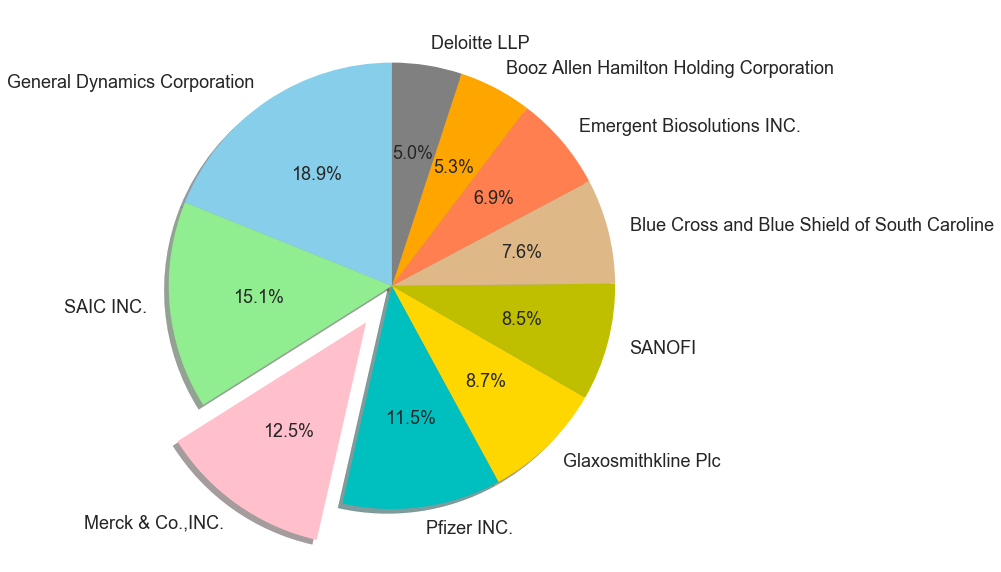

In [75]:
#plot=topten_df.plot.pie(y="federal_action_obligation", figsize=(10,10))

Company_name=["General Dynamics Corporation", "SAIC INC.", "Merck & Co.,INC.", "Pfizer INC.", 
              "Glaxosmithkline Plc", "SANOFI", "Blue Cross and Blue Shield of South Caroline", "Emergent Biosolutions INC.", 
              "Booz Allen Hamilton Holding Corporation", "Deloitte LLP"]
obligation=topten_df["federal_action_obligation"]
#explode = (0, 0.01, 0, 0, 0, 0, 0, 0, 0, 0)

#plt.title("Comparision of Top Ten Companies")
# fig = plt.figure(10, figsize=(10,20))
plt.figure(10, figsize=(10,20))

colors=('skyblue', 'lightgreen', 'pink', 'c', 'gold', 'y', 'burlywood', 'coral', 'orange', 'grey')
plt.pie(obligation, colors=colors, labels=Company_name, textprops={'size': '18'},
        autopct="%1.1f%%", shadow=True, startangle=90, explode=(0,0,0.2,0,0,0,0,0,0,0))

plt.savefig("Images/Top_ten_companies_RT.png")
plt.show()


In [49]:
#deleting unnecesary columns
topten_df_new=topten_df.drop(topten_df[["Total"]], axis=1)
#topten_df_new=topten_df.drop("Total", axis=1, inplace=True)
topten_df_new.reset_index()



,recipient_parent_name,action_date_fiscal_year,federal_action_obligation,Percentage
0,GENERAL DYNAMICS CORPORATION,2355274,7.280812e+09,4.418690
1,SAIC INC.,2137152,5.797954e+09,3.518750
2,"MERCK & CO., INC.",434939,4.808527e+09,2.918271
3,PFIZER INC.,495916,4.423094e+09,2.684354
4,GLAXOSMITHKLINE PLC,1188980,3.361246e+09,2.039924
5,SANOFI,1206938,3.274350e+09,1.987187
6,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1149213,2.931020e+09,1.778822
7,EMERGENT BIOSOLUTIONS INC.,328715,2.658780e+09,1.613600
8,BOOZ ALLEN HAMILTON HOLDING CORPORATION,3789591,2.038091e+09,1.236907
9,DELOITTE LLP,4834320,1.940960e+09,1.177959


In [50]:
# top_list=top_list_df.drop("action_date_fiscal_year", axis=1, inplace=True)
# #top_list=topten_df.drop(topten_df.columns[[0,3,4]], axis=1)
# top_list=top_list.sort_values(["federal_action_obligation"], ascending=True)
# top_list
# #top_list=topten_df(["federal_action_obligation"]/1000000000000)

In [76]:
topten_df_new["total_obligation_billion"] = (topten_df_new["federal_action_obligation"] / 1000000000).round(1)
topten_df_new=topten_df_new.sort_values(["federal_action_obligation"], ascending=True)
topten_df_new.reset_index(inplace=True)
topten_df_new

,recipient_parent_name,action_date_fiscal_year,federal_action_obligation,Percentage,total_obligation_billion
0,DELOITTE LLP,4834320,1.940960e+09,1.177959,1.9
1,BOOZ ALLEN HAMILTON HOLDING CORPORATION,3789591,2.038091e+09,1.236907,2.0
2,EMERGENT BIOSOLUTIONS INC.,328715,2.658780e+09,1.613600,2.7
3,BLUE CROSS AND BLUE SHIELD OF SOUTH CAROLINA,1149213,2.931020e+09,1.778822,2.9
4,SANOFI,1206938,3.274350e+09,1.987187,3.3
5,GLAXOSMITHKLINE PLC,1188980,3.361246e+09,2.039924,3.4
6,PFIZER INC.,495916,4.423094e+09,2.684354,4.4
7,"MERCK & CO., INC.",434939,4.808527e+09,2.918271,4.8
8,SAIC INC.,2137152,5.797954e+09,3.518750,5.8
9,GENERAL DYNAMICS CORPORATION,2355274,7.280812e+09,4.418690,7.3


In [52]:
# top_list=top_list["total_obligation_billion"].map('{:.2f}%'.format)
# top_companies_df=pd.DataFrame(top_list)
# top_companies_df

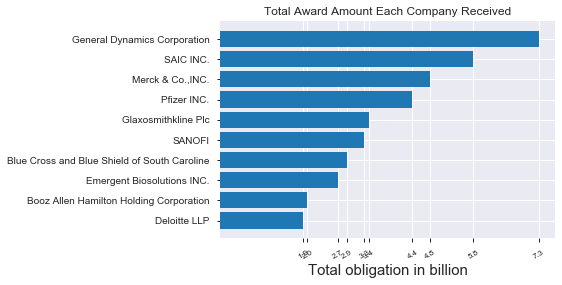

<Figure size 1296x1296 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [80]:
company = ("Deloitte LLP","Booz Allen Hamilton Holding Corporation","Emergent Biosolutions INC.",
            "Blue Cross and Blue Shield of South Caroline", 
           "SANOFI","Glaxosmithkline Plc","Pfizer INC.","Merck & Co.,INC.","SAIC INC.","General Dynamics Corporation", 
            )
x_axis = topten_df_new.iloc[:,4]                     # ["total_obligation_billion"]

y_axis = np.arange(len(company))
#x_axis=top_list["federal_action_obligation"]
#top_list.plot.barh(x=["federal_action_obligation"], y= "Percentage", label="compay")

plt.barh(company,x_axis)
plt.grid(True)

plt.xlabel('Total obligation in billion', fontsize=15)
#plt.ylabel('Top Ten Companies', fontsize=15)
plt.xticks(x_axis, fontsize=8, rotation=30)
plt.title('Total Award Amount Each Company Received')
fig = plt.figure(figsize=(18, 18))
#.figure(figsize=(20,50))
plt.show()

#top_list.plot(x='Percentage', y='total_obligation_billion', kind='barh')
plt.savefig("Images/Top_ten_companies_barh_RT1.png")
